# Mean and Standard Deviation

Welcome! This workshop is from [TrainingDataScience.com](https://trainingdatascience.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual). Sign up to receive more free workshops, training and videos.

This workshop is about two fundamental measures of data. I want to you start thinking about how you can best describe or summarise data. How can we best take a set of data and describe that data in as few variables as possible? These are called _summary statistics_ because they summarise statistical data. In other words, this is your first model!

In [1]:
import numpy as np

## Mean

The _mean_, also known as the average, is a measure of the tendency of the data. For example, if you were provided some data then you could say that, on average, is most likely best represented by the mean.

The mean is calculated as:

$$\mu = \frac{\sum_{i=0}^{N}{ x_i }} {N}$$

The sum of all observations divided by the number of observations.

In [2]:
x = [6, 4, 6, 9, 4, 4, 9, 7, 3, 6];

In [3]:
N = len(x)
x_sum = 0
for i in range(N):
    x_sum = x_sum + x[i]
mu = x_sum / N
print("μ =", mu)

μ = 5.8


Of course, we should be using libraries to reduce the amount of code we have to write. For low level tasks such as this, the most common library is called Numpy.

We can rewrite the above as:

In [4]:
N = len(x)
x_sum = np.sum(x)
mu = x_sum / N
print("μ =", mu)

μ = 5.8


We can take this even further and just use Numpy's implementation of the mean:

In [5]:
print("μ =", np.mean(x))

μ = 5.8


## Standard Deviation

To describe our data, the mean alone doesn't provide enough information. It tells us what value we should observe on average. But the values could be +/- 1 or +/- 100 of that value. (+/- is shorthand for "plus or minus", i.e. "could be greater than or less than this value").

To provide this information we need a measure of "spread" around the mean. The most common measure of "spread" is the _standard deviation_.

Read more about the standard deviation at: [TrainingDataScience.com - Why do we use Standard Deviation and is it Right?](https://trainingdatascience.com/tips/why-do-we-use-standard-deviation/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual).

The standard deviation of a population is:

$$\sigma = \sqrt{ \frac{\sum_{i=0}^{N}{ (x_i - \mu )^2 }} {N} }$$

In [6]:
x = [6, 4, 6, 9, 4, 4, 9, 7, 3, 6];

In [7]:
N = len(x)
mu = np.mean(x)
print("μ =", mu)

μ = 5.8


In [8]:
print("Deviations from the mean:", x - mu)
print("Squared deviations from the mean:", (x - mu)**2)
print("Sum of squared deviations from the mean:", ((x - mu)**2).sum() )
print("Mean of squared deviations from the mean:", ((x - mu)**2).sum() / N )

Deviations from the mean: [ 0.2 -1.8  0.2  3.2 -1.8 -1.8  3.2  1.2 -2.8  0.2]
Squared deviations from the mean: [  0.04   3.24   0.04  10.24   3.24   3.24  10.24   1.44   7.84   0.04]
Sum of squared deviations from the mean: 39.6
Mean of squared deviations from the mean: 3.96


In [9]:
print("σ =", np.sqrt(((x - mu)**2).sum() / N ))

σ = 1.98997487421


Again, we don't need to code this all up. The Numpy equivalent is:

In [10]:
print("σ =", np.std(x))

σ = 1.98997487421


## What's the Catch?

You knew they'd be a catch, right? ;-)

I didn't mention it at the start, but the two previous measures of the central tendency and the spread are specific to a very special combination of data.

If the observations are _distributed_ in a special way, then these metrics perfectly _model_ the underlying data. If not, then these metrics are invalid.

You probably said "huh?" to a few of those new words, so let's go through them.

# Information and Entropy

Welcome! This workshop is from [TrainingDataScience.com](https://trainingdatascience.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual). Sign up to receive more free workshops, training and videos.

Remember the goal of data science. The goal is to make a decision based upon some data. The quality of that decision depends on our information. If we have good, clear information then we can make well informed decisions. If we have bad, messy data then our decisions will be poor.

## Classification

In the context of classification, which is the the attempt to predict which _class_ an observation belongs to, we can be more certain about a result if our algorithm is able to separate the classes _cleanly_.

One measure of how _clean_ or _pure_ a collection of classes are is Entropy.

In this workshop we will mathematically define entropy, which is a measure of the amount of information that can be stored in a limited number of bits.

In [11]:
import numpy as np # Numpy is a general purpose mathematical library for Python. 
                   # Most higher level data science libraries use Numpy under the bonnet.

In [12]:
X = np.array([0, 0, 1, 1, -1, -1, 100]) # Create an array. All numpy funcitons expect the data in a Numpy array.
print(np.mean(X))
print(np.var(X))

14.2857142857
1225.06122449


# Entropy

Remember entrpopy is defined as:

$$H=-\sum(p_i \log_2 (p_i))$$

Where \\(p_i\\) is the probability that the observation belongs to class \\(i\\). (i.e. $p(y==c)/n$, where y is the target, c is the class of interest and n is the total number of samples)

For example, if we have two classes:

$$H=-p_1 \log_2 (p_1)-p_2 \log_2 (p_2)$$


### Task

- Read through this code and understand what is going on.
- Try calculating the entropy of another array of values. What happens when you add more values? Change values?

In [13]:
X = np.array([[4.2, 92], [6.4, 102], [3.5, 3], [4.7, 10]])  # Numpy arrays are general purpose mathematical arrays
y = np.array([0, 0, 1, 1])                                  # They implement all kinds of useful operators, like the == operator.

In [14]:
def entropy(y):
    probs = [] # Probabilities of each class label
    for c in set(y): # Set gets a unique set of values. We're iterating over each value
        num_same_class = sum(y == c)  # Remember that true == 1, so we can sum.
        p = num_same_class / len(y) # Probability of this class label
        probs.append(p)
    return np.sum(-p * np.log2(p) for p in probs)

In [15]:
print(entropy(y)) # Should be 1.0

1.0


# Information gain

Imagine we had some data like that of `X` and `y` above, where `X` are the fetures and `y` are the class labels.

We could propose a threshold or a rule that would split the data in `X` to separate the classes. How would we quantify which was the best split?

What we can do is compare the entropy of the parent before the split against the weighted combination of the entropy after the split. I.e. if three observations end up in the left bucket and one in the right, then the left bucket will account for three quarters of the child's entropy.

If we subtract the parent entropy from the weighted child's entroy, we're left with a measure of _improvement_. This is called the _information gain_.

The information gain is defined as the parent entropy minus the weighted entropy of the subgroups.

$$
\begin{align}
IG(parent, children) = & entropy(parent) - \nonumber \\\\
& \left(p(c_1)entropy(c_1) + p(c_2)entropy(c_2) + ...\right)
\end{align}
$$

### Tasks:

- Given the following `information_gain` function (understand it) pick some splits and calculate the information gain. Which is better?

In [16]:
def information_gain(parent, left_split, right_split):
    return entropy(parent) - (len(left_split) / len(parent)) * entropy(left_split) - (len(right_split) / len(parent)) * entropy(right_split)

In [17]:
# Make a split around the first column, < 5.0:
split1 = information_gain(y, y[X[:, 0] < 5.0], y[X[:, 0] > 5.0])
print("%0.2f" % split1)   # Should be 0.31

0.31


In [18]:
# Make a split around the second column, < 50.0:
split2 = information_gain(y, y[X[:, 1] < 50], y[X[:, 1] > 50])
print(split2)   # Should be 1.0
print("Split %d is better" % ((split1 < split2) + 1))     # Split 2 should be better, higher information gain

1.0
Split 2 is better


# Feature selection by information gain

Welcome! This workshop is from [TrainingDataScience.com](https://trainingdatascience.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual). Sign up to receive more free workshops, training and videos.

One simple way to evaluate the importance of features (something we will deal with later) is to calculate the entropy for prospective splits.

In this example, we will look at a real dataset called the ["mushroom dataset"](https://archive.ics.uci.edu/ml/datasets/mushroom). It is a large collection of data about poisonous and edible mushrooms.

Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s

In [19]:
# Load the data with a library called pandas. Pandas is very cool, and we will be using it a lot.
import pandas as pd
import numpy as np

# We're going to use the display module to embed some outputs
from IPython.display import display

# Read data using Pandas from the UCI data repository.
feature_names = ["poisonous", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
X = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=0, names=feature_names)
y = X["poisonous"]                      # Select target label
X.drop(['poisonous'], axis=1, inplace=True)   # Remove target label from dataset
display(X.head())                       # Show some data

y = y.map({"e": 0, "p": 1})             # Mapping the classes to zeros and ones, not strictly necessary.
display(y.head())

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g


0    0
1    0
2    1
3    0
4    0
Name: poisonous, dtype: int64

In [20]:
# This is the entropy method we defined in the Entropy workshop
def entropy(y):
    probs = [] # Probabilities of each class label
    for c in set(y): # Set gets a unique set of values. We're iterating over each value
        num_same_class = sum(y == c)  # Remember that true == 1, so we can sum.
        p = num_same_class / len(y) # Probability of this class label
        probs.append(p)
    return np.sum(-p * np.log2(p) for p in probs)

# What is the entropy of the entire set?
print("Entire set entropy = %.2f" % entropy(y))

Entire set entropy = 1.00


In [21]:
# Let's write some functions that calculates the entropy after splitting on a particular value

def class_probability(feature, y):
    """Calculates the proportional length of each value in the set of instances"""
    # This is doc string, used for documentation
    probs = []
    for value in set(feature):
        select = feature == value # Split by feature value into two classes
        y_new = y[select]         # Those that exist in this class are now in y_new
        probs.append(float(len(y_new))/len(X))  # Convert to float, because ints don't divide well
    return probs

def class_entropy(feature, y):
    """Calculates the entropy for each value in the set of instances"""
    ents = []
    for value in set(feature):
        select = feature == value # Split by feature value into two classes
        y_new = y[select]         # Those that exist in this class are now in y_new
        ents.append(entropy(y_new))
    return ents

def proportionate_class_entropy(feature, y):
    """Calculatates the weighted proportional entropy for a feature when splitting on all values"""
    probs = class_probability(feature, y)
    ents = class_entropy(feature, y)
    return np.sum(np.multiply(probs, ents)) # Information gain equation


In [22]:
# Let's try calculating the entropy after splitting by all the values in "cap-shape"
new_entropy = proportionate_class_entropy(X["cap-shape"], y)
print("Information gain of %.2f" % (entropy(y) - new_entropy))
# Should be an information gain of 0.05

Information gain of 0.05


In [23]:
# Now let's try doing the same when splitting based upon all values of "odor"
new_entropy = proportionate_class_entropy(X["odor"], y)
print("Information gain of %.2f" % (entropy(y) - new_entropy))
# Should be an information gain of 0.91

Information gain of 0.91


Clearly, if we were thinking about looking at individual features, then `odor` would be a far better prospect than `cap-shape`.

This is cool. You have manually implemented a Decision Tree! Well done! Later on we'll use a library to do this sort of thing.

### Which Feature Produces the Best Split?

We can repeat this process for all features. The best split is the one with the highest information gain.

In [24]:
for c in X.columns:
    new_entropy = proportionate_class_entropy(X[c], y)
    print("%s %.2f" % (c, entropy(y) - new_entropy))

cap-shape 0.05
cap-surface 0.03
cap-color 0.04
bruises? 0.19
odor 0.91
gill-attachment 0.01
gill-spacing 0.10
gill-size 0.23
gill-color 0.42
stalk-shape 0.01
stalk-root 0.13
stalk-surface-above-ring 0.28
stalk-surface-below-ring 0.27
stalk-color-above-ring 0.25
stalk-color-below-ring 0.24
veil-type 0.00
veil-color 0.02
ring-number 0.04
ring-type 0.32
spore-print-color 0.48
population 0.20
habitat 0.16


## Plotting

Throughout data science, results are more intruitive to reason about if you present the data or the results in different media.

Plotting is used for everything; investigating data through to presenting results.

You should become familiar with plotting data; below we go through a fairly comprehensive example.

In [25]:
# Matplotlib is _the_ plotting library for python. Most other tools are based 
# upon matplot lib. We will use others as appropriate in the future (mainly
# pandas's helpers)
import matplotlib.pyplot as plt

colours = 'bgrcmk'  # An array of colours used during plotting later on.

def plot_entropy(probability, entropy, labels):
    """Graphical representation of entropy when splitting on each value"""

    # Some complex calculations to get the centre of the bars
    positions = np.array([0])
    positions = np.concatenate((positions, np.cumsum(probability)[:-1]))
    positions += np.divide(probability, 2)
    
    # Plot bars with colours
    plt.bar(positions, entropy, width=probability, color=colours[:len(probability)])

    # Set limits
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    
    # Labels
    plt.ylabel("Entropy")
    plt.xlabel("Probability")
    
    # If labels are provided, plot some text
    if labels:
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        for i, lab in enumerate(labels):
            # Plot text
            plt.text(positions[i], 0.1, lab, fontsize=14, verticalalignment='top', bbox=props)


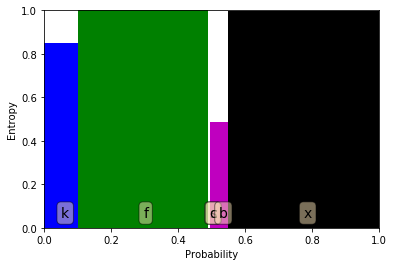

In [26]:
# Plot for "cap-shape" feature
feature = X["cap-shape"]
# Calculate probabilities and entropies
probs = class_probability(feature, y)
ents = class_entropy(feature, y)
labels = set(feature)
plot_entropy(probs, ents, labels)
plt.show() # You must run `plt.show()` at the end to show your plot.

We are plotting the entropy on the y-axis and the proportion of the dataset included when performing that split on the x-axis.

This plot works well for categorical features.

The total entropy of this split is the area that is covered by all of the bars.

We can see that there isn't much whitespace; i.e. not much information gain.

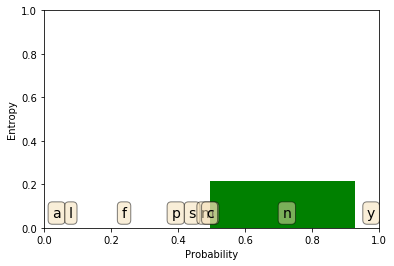

In [27]:
# Plot for "odor" feature
feature = X["odor"]
probs = class_probability(feature, y)
ents = class_entropy(feature, y)
labels = set(feature)
plot_entropy(probs, ents, labels)
plt.show()

This time there is lots of whitespace. The total area is very small.

The propotionate entropy is visibly smaller.

## Tasks

- Which is the better feature to use, `gill-size` or `veil-color`?

## Categorical Decision Trees in SKLearn

Surprisingly, there are still no categorical decision tree implementations in sklearn. You can read more about one proposal [here](https://github.com/scikit-learn/scikit-learn/pull/4899).

So instead, if you wanted to use sklearn, you would have to one-hot encode the categories (which we haven't learnt yet).